<a href="https://colab.research.google.com/github/catdance124/SOM_MNIST/blob/master/Self_Organizing_Map.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SOM
- SOM of colors
- SOM of MNIST

SOM自体のコードはここからお借りした  
https://qiita.com/T_Shinaji/items/609fe9aabd99c287b389

In [0]:
!mkdir colors
!mkdir mnist

In [0]:
import numpy as np
import matplotlib
matplotlib.use('Agg')
from matplotlib import pyplot as plt
from PIL import Image
%matplotlib inline

In [0]:
class SOM():
    def __init__(self, teachers, N, seed=None):
        self.teachers = np.array(teachers)
        self.n_teacher = self.teachers.shape[0]
        self.N = N
        if not seed is None:
            np.random.seed(seed)
            
        x, y = np.meshgrid(range(self.N), range(self.N))
        self.c = np.hstack((x.flatten()[:, np.newaxis],
                            y.flatten()[:, np.newaxis]))
        self.nodes = np.random.rand(self.N * self.N, self.teachers.shape[1])
    
    def train(self, name='colors'):
        for i, teacher in enumerate(self.teachers):
            bmu = self._best_matching_unit(teacher)
            d = np.linalg.norm(self.c - bmu, axis=1)
            L = self._learning_ratio(i)
            S = self._learning_radius(i, d)
            self.nodes += L * S[:, np.newaxis] * (teacher - self.nodes)
            """↓ add for image save ↓"""
            # if i < 100 or i%50 == 0:
            #     plt.title(f'iter:{i:09}')
            #     plt.axis('off')
            #     if name == 'colors':
            #         map_image = self.nodes.reshape((self.N, self.N, -1))
            #     elif name == 'mnist':
            #         map_image = np.zeros((self.N*28, self.N*28))
            #         nodes_grid = self.nodes.reshape(self.N, self.N, -1)
            #         for row_i, row in enumerate(nodes_grid):
            #             for unit_i, unit in enumerate(row):
            #                 map_image[row_i*28:(row_i+1)*28, unit_i*28:(unit_i+1)*28] = unit.reshape(28,28)
            #     plt.imshow(map_image, interpolation='none')
            #     plt.savefig(f'./{name}/{i:09}.png')
            """↑ add ↑"""
        return self.nodes

    def _best_matching_unit(self, teacher):
        #compute all norms (square)
        norms = np.linalg.norm(self.nodes - teacher, axis=1)
        bmu = np.argmin(norms) #argment with minimum element 
        return np.unravel_index(bmu,(self.N, self.N))

    def _neighbourhood(self, t):#neighbourhood radious
        halflife = float(self.n_teacher/4) #for testing
        initial  = float(self.N/2)
        return initial*np.exp(-t/halflife)

    def _learning_ratio(self, t):
        halflife = float(self.n_teacher/4) #for testing
        initial  = 0.1
        return initial*np.exp(-t/halflife)

    def _learning_radius(self, t, d):
        # d is distance from BMU
        s = self._neighbourhood(t)
        return np.exp(-d**2/(2*s**2))

# SOM of color (3 vars/unit)

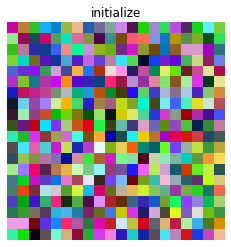

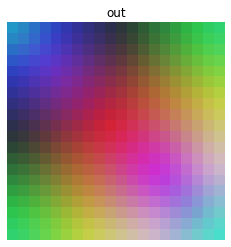

In [0]:
N = 20
teachers = np.random.rand(10000, 3)
som = SOM(teachers, N=N, seed=10)

# Initial map
plt.title('initialize')
plt.axis('off')
plt.imshow(som.nodes.reshape((N, N, 3)), interpolation='none')
plt.show()

# Train
som.train(name='colors')

# Trained MAP
plt.title('out')
plt.axis('off')
plt.imshow(som.nodes.reshape((N, N, 3)), interpolation='none')
plt.show()

# SOM of MNIST (784 vars/unit)

In [0]:
from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

Using TensorFlow backend.


11493376/11490434 [==============================] - 1s 0us/step


In [0]:
N = 20
teachers = train_images.reshape(-1, 28*28)
som = SOM(teachers, N=N, seed=10)

def create_grid_image(N, nodes, resolution=8):
    map_image = np.zeros((N*28, N*28))
    som_node_grid = nodes.reshape(N, N, -1)
    for i, row in enumerate(som_node_grid):
        for j, unit in enumerate(row):
            map_image[i*28:(i+1)*28, j*28:(j+1)*28] = unit.reshape(28,28)
    return map_image

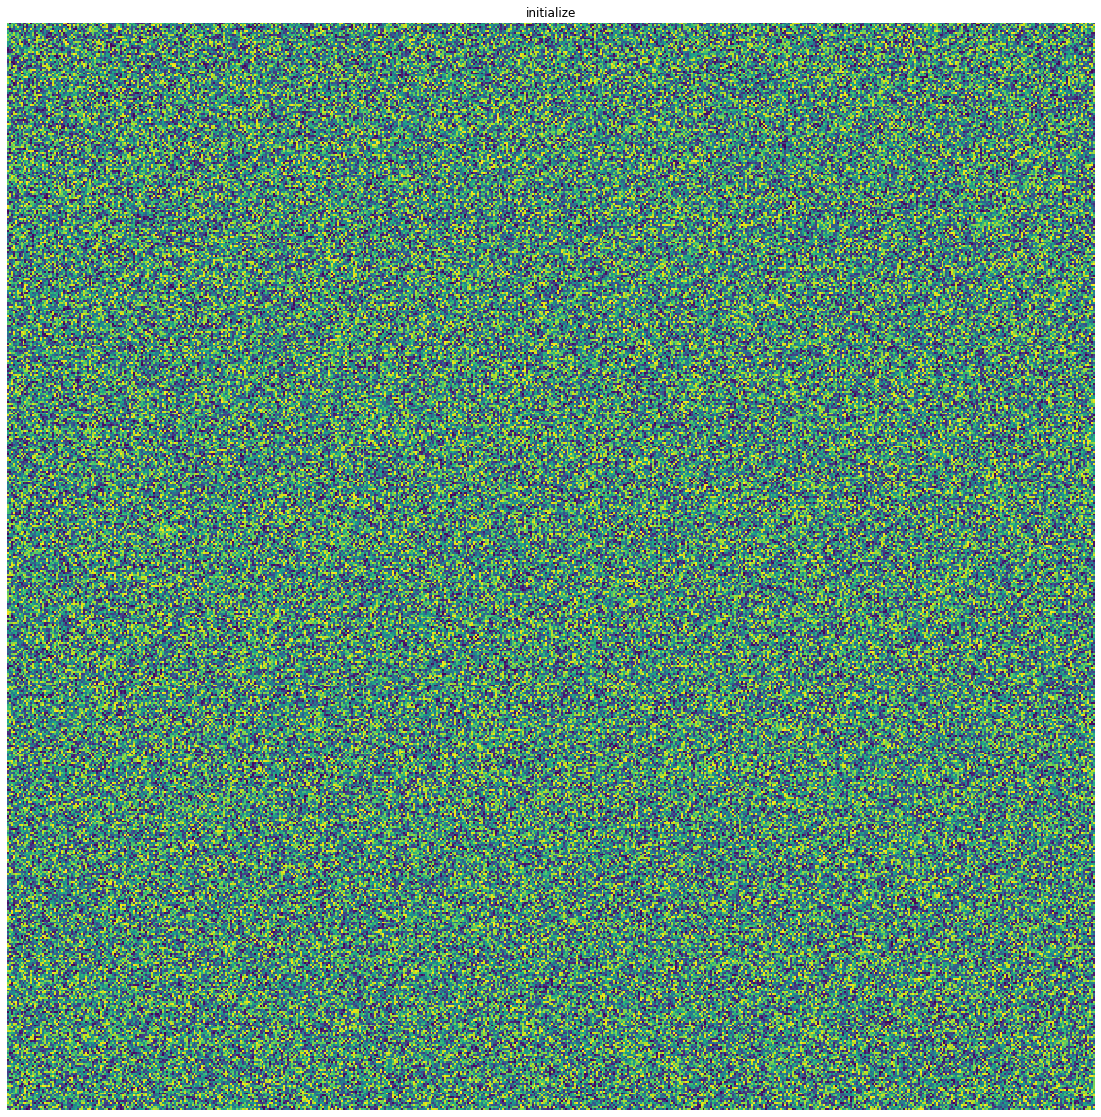

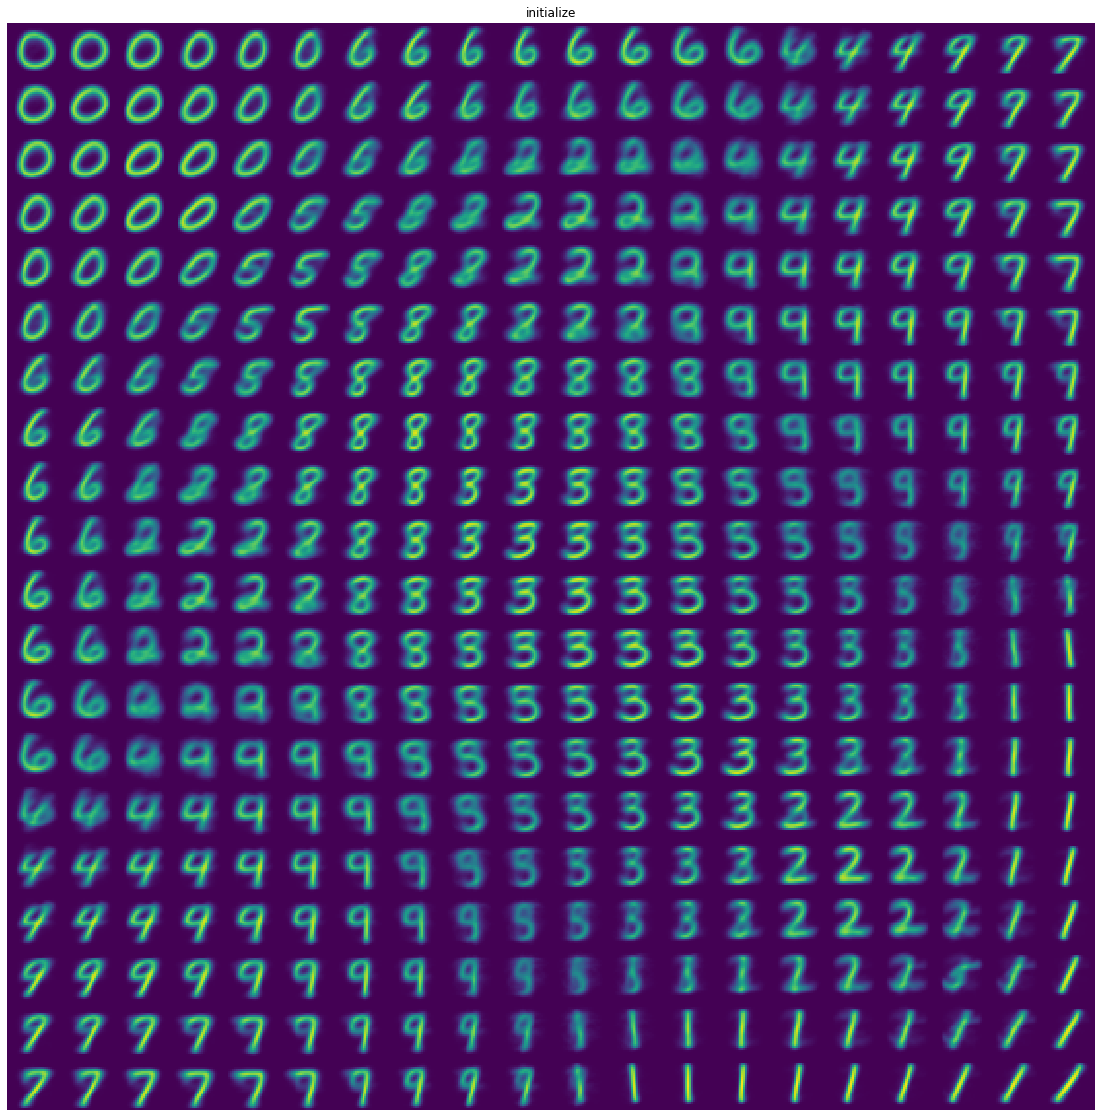

In [0]:
map_image = create_grid_image(N, som.nodes, resolution=28)
plt.figure(figsize=(20,20))
plt.title('initialize')
plt.axis('off')
plt.imshow(map_image ,interpolation='none')
plt.show()

# Train
som.train(name='mnist')

map_image = create_grid_image(N, som.nodes, resolution=28)
plt.figure(figsize=(20,20))
plt.title('initialize')
plt.axis('off')
plt.imshow(map_image ,interpolation='none')
plt.show()